# `geom_sina()`

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


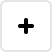
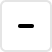
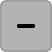
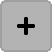
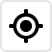
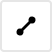
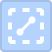
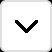
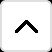
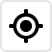
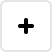
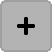
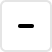
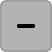
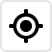
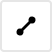
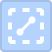
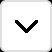
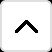
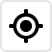

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   
3           4         audi    a4    2.0  2008    4    auto(av)   f   21   30   
4           5         audi    a4    2.8  1999    6    auto(l5)   f   16   26   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact  
3  p  compact  
4  p  compact

In [4]:
xaes, yaes = "drv", "cty"

## Default plot

In [5]:
vparams = dict(size=0, fill="#dddddd")
sparams = dict(seed=42)
g = ggplot(df, aes(xaes, yaes))
v = g + geom_violin(**vparams)
s = v + geom_sina(**sparams)

In [6]:
s

## Parameters and aesthetics

### "jitter" parameters and aesthetics

#### `shape`/`stroke`

In [7]:
gggrid([
    v + geom_sina(aes(shape=xaes), **sparams) + ggtitle("shape aesthetic"),
    v + geom_sina(shape=22, **sparams) + ggtitle("shape parameter"),
    v + geom_sina(aes(stroke=xaes), shape=21, **sparams) + scale_stroke(range=[.5, 2]) + ggtitle("stroke aesthetic"),
    v + geom_sina(shape=21, stroke=2, **sparams) + ggtitle("stroke parameter"),
], ncol=2)

#### `seed`

In [8]:
gggrid([
    v + geom_sina(seed=0) + ggtitle("seed=0"),
    v + geom_sina(seed=0) + ggtitle("seed=0"),
    v + geom_sina(seed=1) + ggtitle("seed=1"),
])

### "violin" parameters and aesthetics

In [9]:
def violin_sina_plot(**params):
    seed = 42
    return g + \
        geom_violin(**{**vparams, **params}) + \
        geom_sina(seed=seed, **params) + \
        ggtitle("\n".join(["{0}: {1}".format(k, v) for k, v in dict(params).items()]))

#### `weight` aesthetic

In [10]:
def weight_plot():
    size = 1.5
    seed = 42
    return g + \
        geom_violin(size=0, fill="red", alpha=.1) + \
        geom_violin(aes(weight="displ"), size=0, fill="blue", alpha=.1) + \
        geom_sina(color="red", size=size, **sparams) + \
        geom_sina(aes(weight="displ"), color="blue", size=size, **sparams) + \
        ggsize(1000, 500)

weight_plot()

#### `orientation`

In [11]:
ggplot(df, aes(yaes, xaes, fill=xaes)) + geom_violin(alpha=.25) + geom_sina(shape=21, **sparams)

#### `quantiles`

In [12]:
def quantiles_plot(quantiles):
    seed = 42
    return g + \
        geom_violin(aes(fill="..quantile.."), alpha=1/3, quantile_lines=True, quantiles=quantiles) + \
        geom_sina(aes(color="..quantile.."), shape=1, size=2, quantiles=quantiles, **sparams) + \
        scale_continuous(["color", "fill"], low="yellow", high="blue") + \
        ggtitle("quantiles={0}".format(quantiles))

gggrid([
    quantiles_plot(None),
    quantiles_plot([.1, .5, .9]),
    quantiles_plot([.5]),
], ncol=1) + ggsize(600, 1200)

#### `show_half`

In [13]:
g + \
    geom_violin(show_half=-1, **vparams) + \
    geom_sina(show_half=1, **sparams)

#### `scale`

In [14]:
gggrid([
    violin_sina_plot(scale='area'),
    violin_sina_plot(scale='width'),
    violin_sina_plot(scale='count'),
], ncol=1) + ggsize(600, 900)

#### `kernel`

In [15]:
gggrid([
    violin_sina_plot(kernel=None),
    violin_sina_plot(kernel='gaussian'),
    violin_sina_plot(kernel='epanechikov'),
    violin_sina_plot(kernel='triangular'),
], ncol=2)

#### `bw`

In [16]:
gggrid([
    violin_sina_plot(bw=None),
    violin_sina_plot(bw='nrd0'),
    violin_sina_plot(bw='nrd'),
    violin_sina_plot(bw=2),
], ncol=2)

#### `adjust`

In [17]:
gggrid([
    violin_sina_plot(adjust=None),
    violin_sina_plot(adjust=2),
], ncol=2)

### Common parameters and aesthetics

#### `alpha`/`color`/`fill`/`size` aesthetics

In [18]:
gggrid([
    v + geom_sina(aes(alpha=xaes), **sparams) + ggtitle("alpha aesthetic"),
    v + geom_sina(alpha=.5, **sparams) + ggtitle("alpha parameter"),
    v + geom_sina(aes(color=xaes), **sparams) + ggtitle("color aesthetic"),
    v + geom_sina(color="red", **sparams) + ggtitle("color parameter"),
    v + geom_sina(aes(fill=xaes), shape=21, **sparams) + ggtitle("fill aesthetic"),
    v + geom_sina(fill="red", shape=21, **sparams) + ggtitle("fill parameter"),
    v + geom_sina(aes(size=xaes), **sparams) + ggtitle("size aesthetic"),
    v + geom_sina(size=1.5, **sparams) + ggtitle("size parameter"),
], ncol=2)

#### `width` aesthetic

In [19]:
gggrid([
    g + geom_violin() + geom_sina(**sparams) + ggtitle("Default plot"),
    g + geom_violin(aes(width=xaes)) + geom_sina(aes(width=xaes), **sparams) + ggtitle("width aesthetic"),
    g + geom_violin(width=1/3) + geom_sina(width=1/3, **sparams) + ggtitle("width parameter"),
], ncol=1) + ggsize(600, 900)

#### `position`

In [20]:
def position_plot(position):
    data = {
        'x': ['a'] * 6,
        'y': [1, 1, 2, 1, 2, 2],
        'g': ['x'] * 3 + ['y'] * 3,
    }
    return ggplot(data, aes('x', 'y', color='g', fill='g')) + \
        geom_violin(alpha=.25, position=position) + \
        geom_sina(shape=21, color="black", position=position, **sparams) + \
        ggtitle("position={0}".format(position))

gggrid([
    position_plot(None),
    position_plot('dodge'),
    position_plot('identity'),
    position_plot(position_jitter(seed=42)),
    position_plot(position_jitterdodge(seed=42)),
    position_plot(position_nudge(x=.2)),
], ncol=2)

#### `show_legend`

In [21]:
gggrid([
    v + geom_sina(aes(color=xaes), **sparams) + ggtitle("Default"),
    v + geom_sina(aes(color=xaes), show_legend=False, **sparams) + ggtitle("show_legend=False"),
])

#### `inherit_aes`

In [22]:
gggrid([
    ggplot(df, aes(color=xaes)) + \
        geom_violin(aes(xaes, yaes)) + \
        geom_sina(aes(xaes, yaes), **sparams) + \
        ggtitle("Default"),
    ggplot(df, aes(color=xaes)) + \
        geom_violin(aes(xaes, yaes)) + \
        geom_sina(aes(xaes, yaes), inherit_aes=False, **sparams) + \
        ggtitle("inherit_aes=False"),
])

#### `manual_key`

In [23]:
v + geom_sina(manual_key=layer_key("Sina"), **sparams)

#### `sampling`

In [24]:
gggrid([
    v + geom_sina(**sparams) + ggtitle("Default"),
    v + geom_sina(sampling=sampling_random(20, seed=42), **sparams) + ggtitle("sampling_random"),
])

#### `tooltips`

In [25]:
def get_tooltips(title):
    return layer_tooltips().title(title).line("(^x, ^y)")\
                                        .line("@|@..violinwidth..")\
                                        .line("@|@..density..")\
                                        .line("@|@..count..")\
                                        .line("@|@..scaled..")\
                                        .line("@|@..quantile..")

g + geom_violin(tooltips=get_tooltips("Violin"), **vparams) + \
    geom_sina(tooltips=get_tooltips("Sina"), **sparams)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


#### `color_by`/`fill_by`

In [26]:
v + geom_sina(aes(paint_a=xaes, paint_b=xaes), shape=21, color_by='paint_a', fill_by='paint_b', **sparams) + \
    scale_brewer('paint_a', name="Color: paint_a='Dark2'", palette='Dark2') + \
    scale_brewer('paint_b', name="Fill: paint_b='Set2'", palette='Set2')

## Stat

### `stat='identity'`

In [27]:
def identity_data():
    return {
        'x': (['a'] * 3 + ['b'] * 3) * 2,
        'y': [1, 2, 3, 1.1, 2.1, 3.1] * 2,
        'violinwidth': [.2, .4, .3] * 2 + [.5, .6, .4] * 2,
        'quantile': [.3, .6, 1] * 4,
        'group': ['s'] * 6 + ['t'] * 6,
    }

def get_identity_tooltips(title):
    return layer_tooltips().title(title).line("(@x, @y)")\
                                        .line("@|@violinwidth")\
                                        .line("@|@quantile")

ggplot(identity_data()) + \
    geom_violin(aes('x', 'y', violinwidth='violinwidth', quantile='quantile', fill='group'),
                alpha=.25, stat='identity', tooltips=get_identity_tooltips("Violin")) + \
    geom_sina(aes('x', 'y', violinwidth='violinwidth', quantile='quantile', color='group'),
              stat='identity', tooltips=get_identity_tooltips("Sina"), **sparams)

### `'sina'` stat

In [28]:
g + geom_violin(color="red", fill="red", alpha=.1, manual_key=layer_key("stat='ydensity'")) + \
    geom_violin(stat='sina', color="blue", alpha=0, manual_key=layer_key("stat='sina'")) + \
    geom_errorbar(aes(ymin='..y..', ymax='..y..', width='..violinwidth..'), stat='sina', color="blue") + \
    geom_point(color="blue", size=2) + \
    ggsize(1000, 500)

## Interaction with other layers

### `ggtb()`

In [29]:
s + ggtb()

### Facets

In [30]:
s + facet_wrap(facets=xaes, ncol=3, scales='free')

### Scales

In [31]:
s + scale_y_continuous(name="City miles per gallon", limits=[0, 50], trans='sqrt')

### Coordinate Systems

In [32]:
gggrid([
    s + ggtitle("Default"),
    s + coord_flip() + ggtitle("coord_flip()"),
    s + coord_polar() + ggtitle("coord_polar()"),
], ncol=1) + ggsize(800, 1600)

### Themes

In [33]:
s + theme_bw() + theme(panel_background=element_rect(fill="#ffffcc")) + flavor_solarized_light()

## Tests

In [34]:
tests = [
    {
        'title': "Empty data",
        'data': {
            'x': [],
            'y': [],
        }
    },
    {
        'title': "One element",
        'data': {
            'x': ['a'],
            'y': [0],
        }
    },
    {
        'title': "Continuous x",
        'data': {
            'x': [0, 1],
            'y': [0, 0],
        }
    },
    {
        'title': "NaN's in data",
        'data': {
            'x': ['a', 'b', np.nan, None, 'b', 'b'],
            'y': [0, 1, 1, 1, np.nan, None],
        }
    },
    {
        'title': "Empty data, identity stat",
        'data': {
            'x': [],
            'y': [],
        },
        'stat': 'identity'
    },
    {
        'title': "One element, identity stat",
        'data': {
            'x': ['a'],
            'y': [0],
        },
        'stat': 'identity'
    },
    {
        'title': "Continuous x, identity stat",
        'data': {
            'x': [0, 1],
            'y': [0, 0],
        },
        'stat': 'identity'
    },
    {
        'title': "NaN's in data, identity stat",
        'data': {
            'x': ['a', 'b', np.nan, None, 'b', 'b'],
            'y': [0, 1, 1, 1, np.nan, None],
        },
        'stat': 'identity'
    },
]

gggrid([
    ggplot(t['data'], aes('x', 'y')) + \
        geom_sina(stat=t['stat'] if 'stat' in t else None, **sparams) + \
        ggtitle(t['title'])
    for t in tests
], ncol=2)

In [35]:
def get_mapping(var):
    if var is None:
        return aes('x', 'y')
    else:
        return aes('x', 'y', color=var, fill=var)

p_working = lambda var: ggplot({'x': [0], 'y': [0]}, get_mapping(var))

p_no_data = lambda var: ggplot(mapping=aes('x', 'y', color=var, fill=var)) if var is not None else ggplot(mapping=aes('x', 'y'))

p_empty = lambda var: ggplot({'x': [], 'y': []}, get_mapping(var))

p_facet_nan = lambda var: ggplot({'x': [0, np.nan], 'y': [0, 0], 'g': ["A", "B"]}, get_mapping(var)) + facet_grid(x='g')

p_facet_cross = lambda var: ggplot({'x': [0, 0], 'y': [0, 0], 'g1': ["A", "B"], 'g2': ["C", "D"]}, get_mapping(var)) + facet_grid(x='g1', y='g2')

p_group = ggplot({'x': [0, np.nan], 'y': [0, 0], 'g': ["A", "B"]}, aes('x', 'y', color='g', fill='g'))

p_nan = lambda var: ggplot({'x': [np.nan], 'y': [np.nan]}, get_mapping(var))

p_lim = lambda var: ggplot({'x': [0], 'y': [0]}, get_mapping(var)) + xlim(1, 2)

gggrid([
    p_working("..violinwidth..") + geom_sina(**sparams),
    p_no_data("..violinwidth..") + geom_sina(**sparams),
    p_empty("..violinwidth..") + geom_sina(**sparams),
    p_facet_nan("..violinwidth..") + geom_sina(**sparams),
    p_facet_cross("..violinwidth..") + geom_sina(**sparams),
    p_group + geom_sina(**sparams),
    p_nan("..violinwidth..") + geom_sina(**sparams),
    p_lim("..violinwidth..") + geom_sina(**sparams),
], ncol=2)

### Regressions

In [36]:
def regression_data1():
    np.random.seed(42)
    return {
        "val": np.random.randint(5, size=18),
    }

In [37]:
ggplot(regression_data1(), aes(y="val")) + \
    geom_violin(**vparams) + \
    geom_sina(tooltips=layer_tooltips(["..y..", "..violinwidth.."]),
              **sparams) + \
    ggtitle("All points should be inside the violin")

In [38]:
ggplot(regression_data1(), aes(y="val")) + \
    geom_violin(**vparams) + \
    geom_sina(seed=0) + \
    ggtitle("All points should be inside the plot panel")